# Project Part 2

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/Matthew-Bustamante/CS39AA-Project-Cyberbullying/blob/main/project_part2.ipynb)


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Matthew-Bustamante/CS39AA-Project-Cyberbullying/blob/main/project_part2.ipynb)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
input_data_path = 'https://raw.githubusercontent.com/Matthew-Bustamante/CS39AA-Project-Cyberbullying/main/'
training_data_file = 'CyberBullying_Comments_Dataset.csv'
df = pd.read_csv(input_data_path + training_data_file)
df.head()

,Text,CB_Label
0,damn there is someones nana up here at beach w...,0
1,no kidding! dick clark was a corpse mechanical...,0
2,i read an article on jobros and thought damn w...,0
3,I got one fucking day of sprinkles and now it'...,0
4,I was already listening to Elliott smith and ...,0


Splitting the data

In [3]:
from sklearn.model_selection import train_test_split

X = df['Text'].copy()
y = df['CB_Label'].copy()

X_train_raw, X_val_raw, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

Next we're going to vectorize the data

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(X_train_raw).toarray()

print(f"X_train.shape = {X_train.shape}")
type(X_train)

X_train.shape = (8880, 15603)


numpy.ndarray

Now its time to implement a baseline model to the data.  For right now we'll use RandomForestClassifier to get a baseline view of how the data will work

accuracy (on y_train): 0.9975


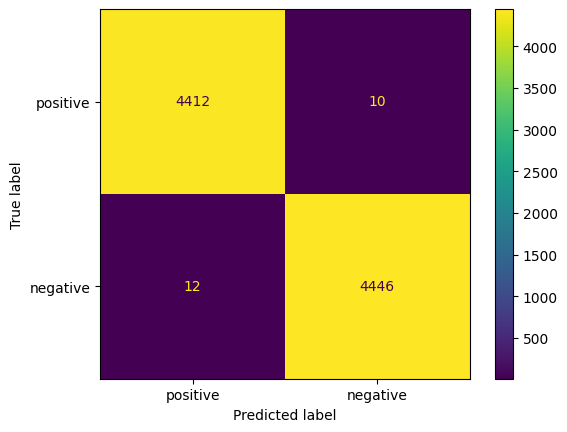

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

model = RandomForestClassifier(n_estimators=25)
model = model.fit(X_train, y_train)

predictions_train = model.predict(X_train)

disp = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train), display_labels=['positive', 'negative'])
disp.plot()
print(f"accuracy (on y_train): {accuracy_score(y_train, predictions_train):.4f}")

Checking to make sure the validation data looks like what we expect it to be

In [6]:
X_val = tfidf_vectorizer.transform(X_val_raw).toarray()
print(f"X_val.shape = {X_val.shape}")
type(X_val)

X_val.shape = (2220, 15603)


numpy.ndarray

accuracy (on y_val): 0.7518


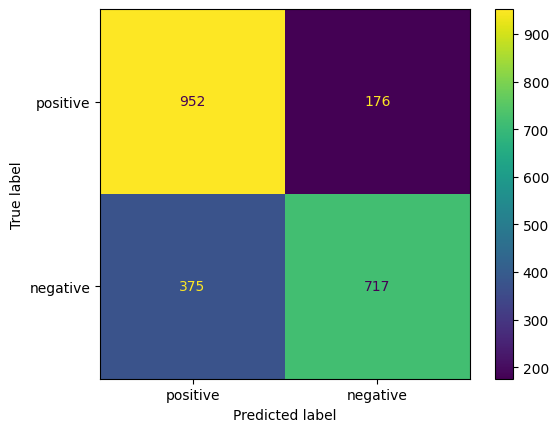

In [7]:
predictions_val = model.predict(X_val)
disp = ConfusionMatrixDisplay(confusion_matrix(y_val, predictions_val), display_labels=['positive','negative'])
disp.plot()
print(f"accuracy (on y_val): {accuracy_score(y_val, predictions_val):.4f}")

So our accuracy for this model is pretty bad with the model having an accuracy of 75%.  Let's see if we can find a hyperparameter that can tune this model to be more accurate.